In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe

import utils

In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B' # name_A = 'WISE 1049A'; name_B = 'WISE 1049B'
#color_A = '0.45'; color_B = '0.0'
lw_d = 0.8

#color_m = 'C1'
#color_m_A = 'C0'; color_m_B = 'C3'
color_m_A = '#FF7B2E'; color_m_B = '#396ED8'
color_A = '#FF7B2E'; color_B = '#396ED8'
lw_m = 1.0

In [3]:
Res_A = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_A_ret_7/test_', 
    m_set='J1226_A', w_set='J1226'
    )
d_spec_A = Res_A._load_object('d_spec', bestfit_prefix=False)

Res_B = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_B_ret_25/test_', 
    m_set='J1226_A', w_set='J1226'
    )
d_spec_B = Res_B._load_object('d_spec', bestfit_prefix=False)

  analysing data from ../retrieval_outputs/fiducial_J_A_ret_7/test_.txt
  analysing data from ../retrieval_outputs/fiducial_J_B_ret_25/test_.txt


## Observations

In [4]:
def indicate_ghost(ax, v_bary, show_text=True, cmap=mpl.colors.LinearSegmentedColormap.from_list('',['0.85','1.0'])):
    
    ghosts = np.array([
        [1119.44,1120.33], [1142.78,1143.76], [1167.12,1168.08], 
        [1192.52,1193.49], [1219.01,1220.04], [1246.71,1247.76], 
        [1275.70,1276.80], [1306.05,1307.15], [1337.98,1338.94], 
    ])
    ghosts += np.array([-0.1,+0.1])
    ghosts *= (1+v_bary/3e5)

    ylim = ax.get_ylim()
    height = np.abs(np.diff(ylim))
    for ghost_i in ghosts:
        # Plot the masked wavelengths due to the ghost signature
        '''
        ax.errorbar(
            ghost_i.mean(), y0+0.05*height, 
            xerr=np.abs(ghost_i[:,None]-ghost_i.mean()), 
            c='k', capsize=3, lw=1, capthick=1
        )
        ax.annotate(
            'ghost', xy=(ghost_i.mean(),y0+0.07*height), 
            ha='center', va='bottom', fontsize=9
        )
        '''
        
        Z = np.abs(np.linspace(*ghost_i, 20) - ghost_i.mean())
        ax.imshow(
            Z.reshape(-1,1).T, cmap=cmap, vmin=0, vmax=Z.max(), 
            extent=[*ghost_i, *ylim], interpolation='bilinear', 
            aspect='auto', zorder=-1
            )
        if show_text:
            ax.annotate(
                'ghost', xy=(ghost_i.mean(),ylim[0]+0.07*height), rotation=90, 
                ha='center', va='bottom', fontsize=9, color='0.4'
            )
        
def indicate_lines(ax, x, y, label, label_y=None):

    X = np.array([x[0],x[0],x[1],x[1]])
    Y = np.array([y[0],y[1],y[1],y[0]])
    ax.plot(X, Y, c='k', lw=1, transform=ax.get_xaxis_transform())

    text_kwargs = dict(ha='center', va='center', fontsize=12)
    if label_y is None:
        label_y = y[1]
        text_kwargs['bbox'] = {'boxstyle':'square', 'ec':'none', 'fc':'w'}

    ax.text(x=x.mean(), y=label_y, s=label, transform=ax.get_xaxis_transform(), **text_kwargs)

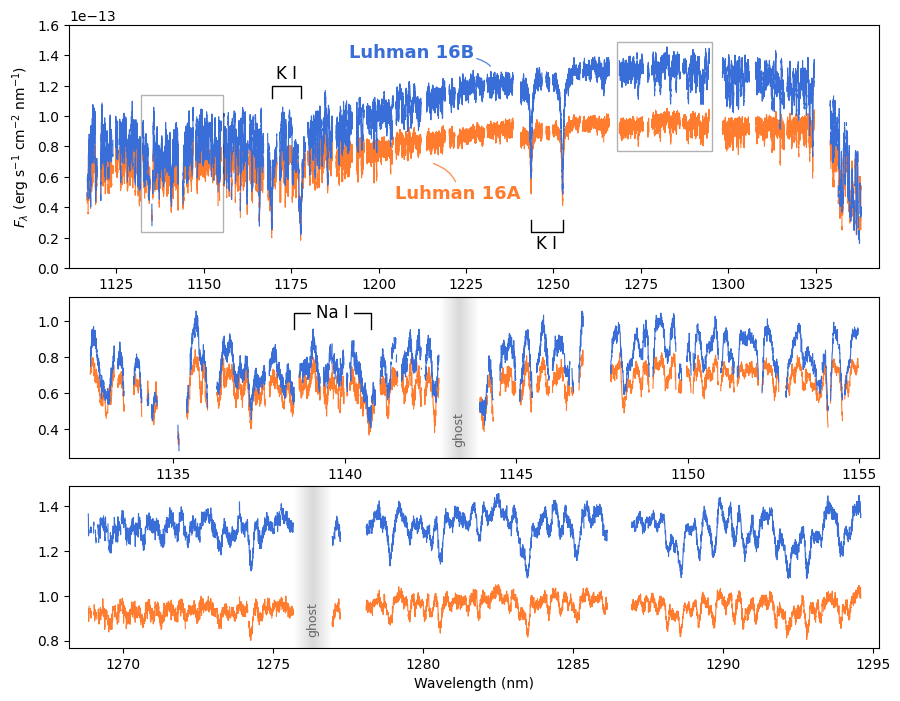

In [5]:
color_m_A = '#FF7B2E'; color_m_B = '#396ED8'
color_A = '#FF7B2E'; color_B = '#396ED8'

scale = 1e-13
orders_to_plot = [[0,1],6]

fig = plt.figure(figsize=(9,7))
gs = fig.add_gridspec(
    nrows=3, ncols=1, hspace=0.15, wspace=0, height_ratios=[0.43,(1-0.43)/2,(1-0.43)/2], 
)
ax = np.array([
    fig.add_subplot(gs[0,0]), 
    fig.add_subplot(gs[1,0]), 
    fig.add_subplot(gs[2,0]), 
])
for i in range(d_spec_B.n_orders):
    for j in range(d_spec_B.n_dets):
        #ax[0].plot(d_spec_B.wave[i,j], d_spec_B.flux_uncorr[i,j]/d_spec_B.transm[i,j], c='k', lw=0.5, alpha=0.3)
        try:
            ax[0].plot(d_spec_A.wave[i,j], d_spec_A.flux[i,j], c=color_A, lw=lw_d)
        except:
            pass

        ax[0].plot(d_spec_B.wave[i,j], d_spec_B.flux[i,j], c=color_B, lw=lw_d)

        if i in orders_to_plot[0]:
            ax[1].plot(d_spec_A.wave[i,j], d_spec_A.flux[i,j]/scale, c=color_A, lw=lw_d)
            ax[1].plot(d_spec_B.wave[i,j], d_spec_B.flux[i,j]/scale, c=color_B, lw=lw_d)
            #ax[1].set(
            #    xlim=(d_spec_A.wave[i,:].min()-0.5,d_spec_A.wave[i,:].max()+0.5)
            #    )

        if i == orders_to_plot[1]:
            ax[2].plot(d_spec_A.wave[i,j], d_spec_A.flux[i,j]/scale, c=color_A, lw=lw_d)
            ax[2].plot(d_spec_B.wave[i,j], d_spec_B.flux[i,j]/scale, c=color_B, lw=lw_d)
            ax[2].set(
                xlim=(d_spec_A.wave[i,:].min()-0.5,d_spec_A.wave[i,:].max()+0.5)
                )

ax[1].set(
    xlim=(
        d_spec_A.wave[orders_to_plot[0],2].min()-0.5,
        d_spec_A.wave[orders_to_plot[0],1].max()+0.5
        )
    )

# Indicate alkali lines
wave_Na = np.array([1e7/8783.82852, 1e7/8766.63258]) * (1+d_spec_A.v_bary/3e5)
indicate_lines(ax[1], wave_Na, [0.8,0.9], label='Na I')

wave_K = np.array([1e7/8551.81787, 1e7/8491.80409]) * (1+d_spec_A.v_bary/3e5)
indicate_lines(ax[0], wave_K, [0.7,0.75], label='K I', label_y=0.8)

wave_K = np.array([1e7/7983.67489, 1e7/8041.38112]) * (1+d_spec_A.v_bary/3e5)
indicate_lines(ax[0], wave_K, [0.2,0.15], label='K I', label_y=0.1)

ax[0].set(xticks=np.arange(1100,1350+1,25))
ax[0].set(
    xlim=(d_spec_B.wave.min()-5,d_spec_B.wave[:,0].max()+5), ylim=(0,1.6e-13), 
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', 
    )
ax[-1].set(xlabel=r'Wavelength (nm)')

for ax_i in ax[1:]:

    # Plot the inset rectangle(s)
    x0 = ax_i.get_xlim()[0]
    y0 = ax_i.get_ylim()[0]
    width  = np.abs(ax_i.get_xlim()[1] - x0)
    height = np.abs(ax_i.get_ylim()[1] - y0)
    bounds = (x0, y0*scale, width, height*scale)

    _, con_patch = ax[0].indicate_inset(
        bounds=bounds, inset_ax=ax_i, edgecolor='k', alpha=0.3, 
        )
    #for con_patch_j in con_patch:
    #    con_patch_j.set_visible(False)
    [con_patch_j.set_visible(False) for con_patch_j in con_patch]

    # Plot the masked wavelengths due to the ghost signature
    indicate_ghost(ax_i, v_bary=d_spec_A.v_bary)


ax[0].annotate(
    name_A, xy=(0.45,0.43), xytext=(0.48,0.27), xycoords='axes fraction', 
    ha='center', va='bottom', c=color_A, fontsize=13, fontweight='bold', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-20', 
        'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_A, 'alpha':0.8, 
        }, 
    )

ax[0].annotate(
    name_B, xy=(0.52,0.83), xytext=(0.5,0.85), xycoords='axes fraction', 
    ha='right', va='bottom', c=color_B, fontsize=13, fontweight='bold', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=-50', 
        'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_B, 'alpha':0.8, 
        }, 
    )

plt.subplots_adjust(left=0.08, bottom=0.07, top=0.96, right=0.98)
plt.savefig('./plots/J_band_spectrum.pdf')
plt.show()

## Best-fitting model

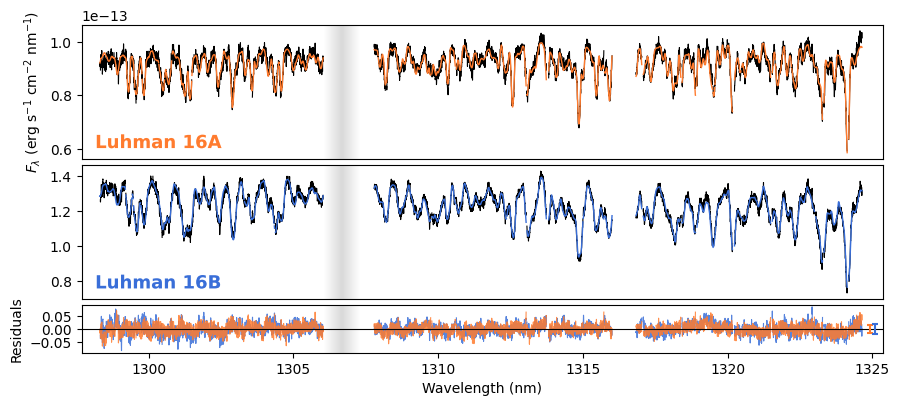

In [6]:
#color_A = color_B
color_A = '0.0'; color_B = '0.0'
res_alpha = 0.85
i = 7

LogLike_A = Res_A._load_object('LogLike', bestfit_prefix=True)
LogLike_B = Res_B._load_object('LogLike', bestfit_prefix=True)

sigma_A = Res_A.get_mean_scaled_uncertainty()
sigma_B = Res_B.get_mean_scaled_uncertainty()

fig = plt.figure(figsize=(9,4))
gs = fig.add_gridspec(
    nrows=3, ncols=1, hspace=0.06, wspace=0, height_ratios=[0.85/2,0.85/2,0.15], 
)
ax = np.array([
    fig.add_subplot(gs[0,0]), 
    fig.add_subplot(gs[1,0]), 
    fig.add_subplot(gs[2,0]), 
])
for j in range(d_spec_B.n_dets):
    ax[0].plot(d_spec_A.wave[i,j], d_spec_A.flux[i,j], c=color_A, lw=lw_d)
    ax[0].plot(d_spec_A.wave[i,j], LogLike_A.m_flux_phi[i,j], c=color_m_A, lw=lw_m)
    
    ax[1].plot(d_spec_B.wave[i,j], d_spec_B.flux[i,j]/scale, c=color_B, lw=lw_d)
    ax[1].plot(d_spec_B.wave[i,j], LogLike_B.m_flux_phi[i,j]/scale, c=color_m_B, lw=lw_m)

    ax[-1].plot(
        d_spec_B.wave[i,j], (d_spec_B.flux[i,j]-LogLike_B.m_flux_phi[i,j])/scale, 
        c=color_m_B, lw=lw_d, alpha=res_alpha
        )
    ax[-1].plot(
        d_spec_A.wave[i,j], (d_spec_A.flux[i,j]-LogLike_A.m_flux_phi[i,j])/scale, 
        c=color_m_A, lw=lw_d, alpha=res_alpha
        )
    
for j, ax_j in enumerate(ax):
    if j != len(ax)-1:
        ax_j.set(xticks=[])
    ax_j.set(xlim=(d_spec_A.wave[i,:].min()-0.5,d_spec_A.wave[i,:].max()+0.6))

    indicate_ghost(
        ax_j, v_bary=d_spec_A.v_bary, show_text=False, 
        cmap=mpl.colors.LinearSegmentedColormap.from_list('',['0.85','1.0'])
        )

ax[-1].axhline(0.0, c=color_B, lw=ax[-1].spines['left'].get_lw())
ax[-1].errorbar(
    d_spec_A.wave[i,:].max()+0.15, 0.0, yerr=sigma_A[i,0]/scale, 
    c=color_m_A, capsize=2, lw=1.5, capthick=1.5
    )
ax[-1].errorbar(
    d_spec_A.wave[i,:].max()+0.35, 0.0, yerr=sigma_B[i,0]/scale, 
    c=color_m_B, capsize=2, lw=1.5, capthick=1.5
    )
ax[-1].set(ylim=(-0.09,0.09))

ax[1].annotate(
    name_B, xy=(0.017,0.05), xycoords='axes fraction', 
    ha='left', va='bottom', c=color_m_B, fontsize=13, fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )
ax[0].annotate(
    name_A, xy=(0.017,0.05), xycoords='axes fraction', 
    ha='left', va='bottom', c=color_m_A, fontsize=13, fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )

ax[0].set(
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$'
    )
ax[-1].set(xlabel=r'Wavelength (nm)', ylabel='Residuals')

plt.subplots_adjust(left=0.09, bottom=0.12, top=0.94, right=0.98)
plt.savefig(f'./plots/J_band_spectrum_bestfit_order{i}.pdf')
plt.show()

In [7]:
del LogLike_A, LogLike_B, d_spec_A, d_spec_B, Res_A

## Cross-correlation

HF
Generating a model with only HF_main_iso
Generating a model w/o HF_main_iso


100%|██████████| 1001/1001 [00:09<00:00, 101.58it/s]


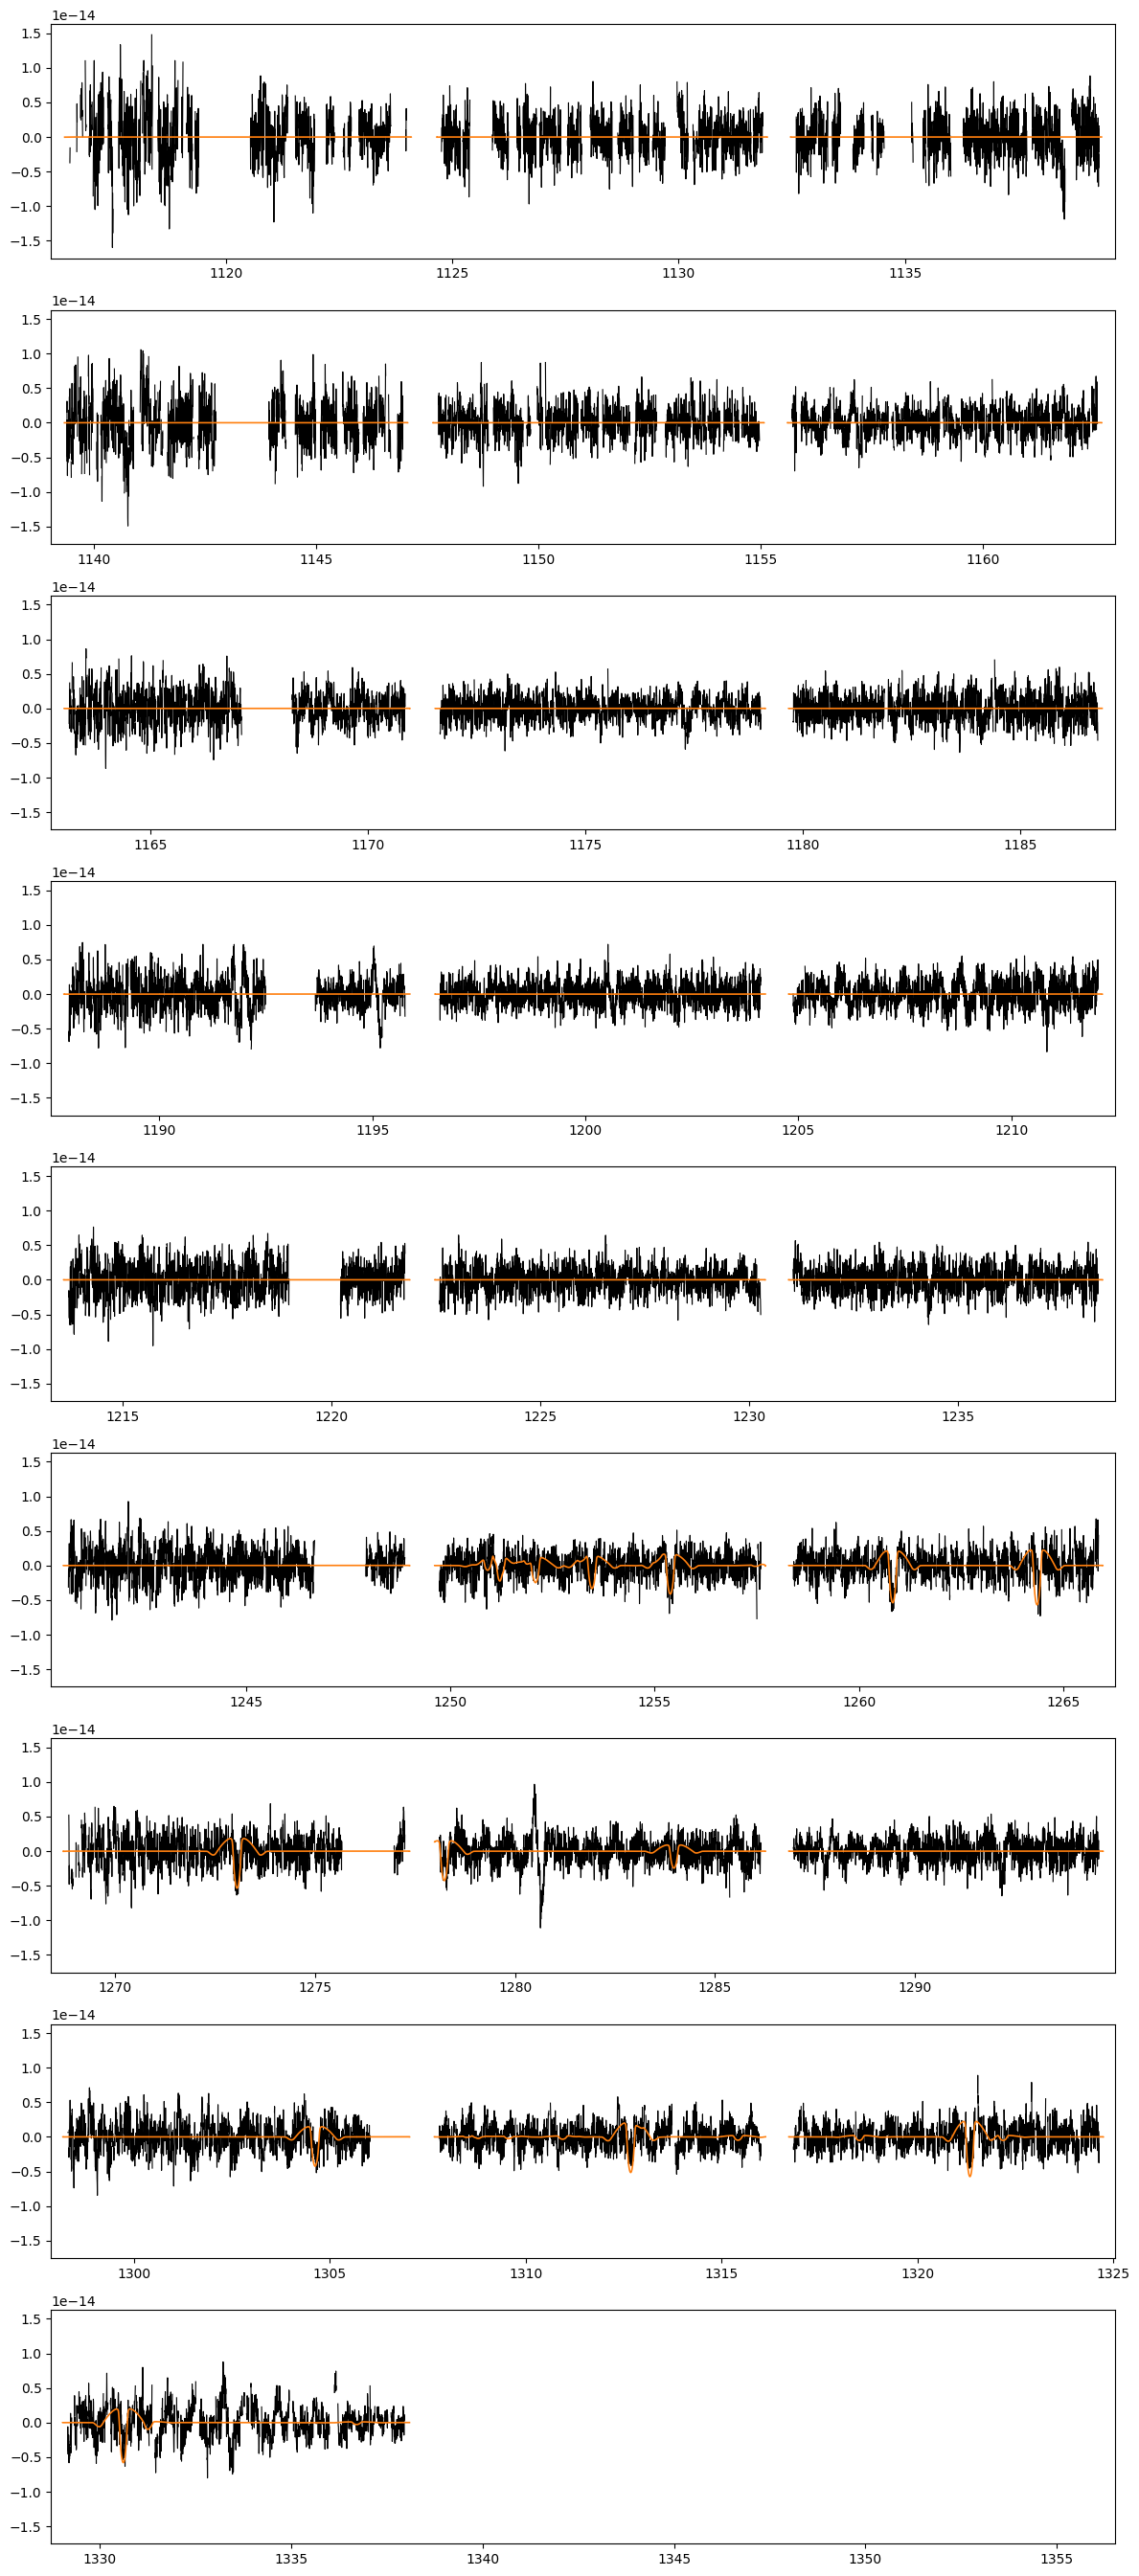

In [8]:
CCF_species = {
    #'complete': None, # Include all species in template

    #'CH4': 'CH4_hargreaves_main_iso'
    #'Mg': 'Mg', 
    #'Mn': 'Mn', 
    #'Cr': 'Cr', 
    'HF': 'HF_main_iso', 
    
    #'FeH': 'FeH_main_iso',
    #'TiO': 'TiO_48_Exomol_McKemmish', 
    #'H2O': 'H2O_pokazatel_main_iso', 
    #'HF': 'HF_main_iso', 
    #'K': 'K', 
    #'Na': 'Na', 
    #'Cr': 'Cr', 
    #'Mn': 'Mn', 
    #'CrH': 'CrH_main_iso', 
    #'VO': 'VO_HyVO_main_iso', 

    #'CaH': 'CaH_XAB_main_iso', 


    #'NH3': 'NH3_coles_main_iso'
    #'Mg': 'Mg', 
    #'Ti': 'Ti'
    #'V': 'V'
    #'Al': 'Al',
    #'Fe': 'Fe', 
    #'NaH': 'NaH_main_iso'

    #'HCl': 'HCl_main_iso'
    }

for key_j, line_species_j in CCF_species.items():

    print(f'{key_j}')
        
    # Template spectrum of a single species
    wave_local, flux_local = Res_B.get_model_spec(
        is_local=False, # Rotationally broadened
        line_species_to_include=line_species_j, 
        return_wave_flux=True, 
        )
    
    # Template spectrum w/o that species
    _, flux_wo_species = Res_B.get_model_spec(
        is_local=False, # Rotationally broadened
        line_species_to_exclude=line_species_j, 
        return_wave_flux=True, 
        )
    
    # Compute cross-correlation
    rv, _, CCF_SNR = Res_B.get_CCF(
        wave_local, flux_local, # Model template
        rv=np.arange(-1000,1000+1e-6,2), 
        model_to_subtract_from_d_res=flux_wo_species, #model_to_subtract_from_d_res=None, 
        model_to_subtract_from_m_res=None, 
        high_pass={
            'm_res': utils.high_pass_filter(window_length=301), # Filter on model
            'd_res': utils.high_pass_filter(window_length=301), # Filter on data
            }, 
        plot=True, 
        rv_sep=300, # Separation to calculate std-dev from
        )
    CCF_species[key_j] = CCF_SNR

    del wave_local, flux_local, flux_wo_species

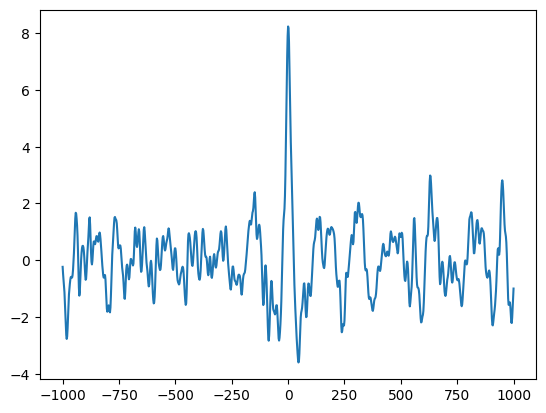

In [9]:
for CCF_i in CCF_species.values():
    plt.plot(rv, CCF_i)
plt.show()